In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.model_selection import train_test_split
from gaussian_process import GaussianProcessRegression
from gaussian_process.kernels import ARD
from gaussian_process.datasets import generate_gp

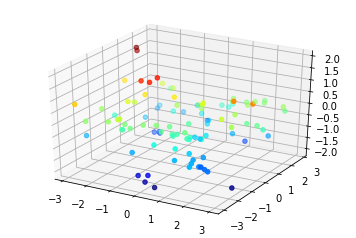

In [3]:
Xtr, Xte, ytr, yte = train_test_split(
    *generate_gp(n_samples=200, n_features=2, kernel=ARD(beta=[1, 3]), random_state=0, noise=0.01),
    train_size=0.5, random_state=0)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Xtr[:,0], Xtr[:,1], ytr, c=ytr, cmap='jet')

RMSE 0.285960216844


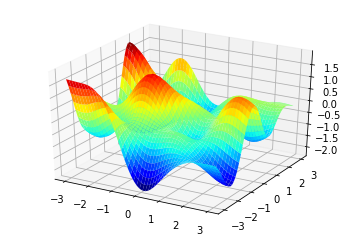

In [4]:
gpr = GaussianProcessRegression(cov=ARD(beta=[1, 1]))
gpr.fit(Xtr, ytr)
Xgrid = np.meshgrid(np.linspace(-3, 3), np.linspace(-3, 3))
ypred_before_eb = gpr.predict(np.stack(Xgrid, 2).reshape(-1, 2))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Xgrid[0], Xgrid[1], ypred_before_eb.reshape(50, 50), cmap='jet')
print("RMSE", np.sqrt(np.mean((gpr.predict(Xte)-yte)**2)))

RMSE 0.208740245085


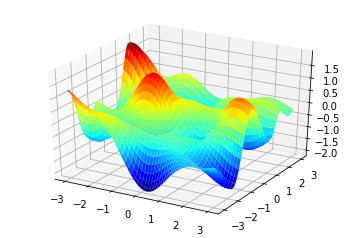

In [5]:
gpr.empirical_bayes()
ypred_after_eb = gpr.predict(np.stack(Xgrid, 2).reshape(-1, 2))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Xgrid[0], Xgrid[1], ypred_after_eb.reshape(50, 50), cmap='jet')
print("RMSE", np.sqrt(np.mean((gpr.predict(Xte)-yte)**2)))

In [6]:
gpr.get_params()['cov__beta']

array([ 1.14651806,  3.7085029 ])